#### SVM on from scratch convolution base nets

In [2]:
import os
import Utils
from keras import models

h5filename = 'cnn from scratch with softmax 60epoch_dropout(0.5)_dense1024_hit(61.63%).h5'
model = Utils.load_model(h5filename)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_11 (Batc (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 44, 44, 32)        9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 44, 44, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 20, 20, 64)        18496     
__________

In [4]:
score = Utils.evaluate_model(model)
print('the accuracy on test datadry without data augment hit %2.2f%%' % (score[1] * 100))

Found 3589 images belonging to 7 classes.
the accuracy on test datadry without data augment hit 61.63%


In [8]:
layer_name = 'dense_7'
train_features, train_labels = Utils.feature_extractor_to_svm(Utils.train_dir, model, layer_name=layer_name)
validation_features, validation_labels = Utils.feature_extractor_to_svm(Utils.validation_dir, model, layer_name=layer_name)
test_features, test_labels = Utils.feature_extractor_to_svm(Utils.test_dir, model, layer_name=layer_name)

Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.
Training dataset:  28709
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
PublicTest dataset:  3589
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
PrivateTest dataset:  3589


In [9]:
from sklearn.svm import SVC

def svc(traindata, trainlabel, testdata, testlabel):
    print("feed softmax layer output activation to SVM with rbf kernel funtion...")
    clf = SVC(C=1.0, kernel="rbf", cache_size=3000)
    clf.fit(traindata, trainlabel)

    pred_testlabel = clf.predict(testdata)
    # print(pred_testlabel[:10], testlabel[:10])
    num = len(pred_testlabel)
    accuracy = len([1 for i in range(num) if testlabel[i]==pred_testlabel[i]])/float(num)    
    return clf, accuracy

In [10]:
clf, acc = svc(train_features, train_labels, validation_features, validation_labels)
print("svm on the top of cnn(from scratch60epoch(0.6163) hit %.2f%% accuracy:" % (acc * 100))

feed softmax layer output activation to SVM with rbf kernel funtion...
svm on the top of cnn(from scratch60epoch(0.6163) hit 62.11% accuracy:


In [26]:
clf = joblib.load(filepath) 
score = clf.score(test_features, test_labels)
print(score)

0.623014767345


In [29]:
from sklearn.externals import joblib

filename = 'svm with dense layer output(cnn from scratch 60epoch_61.63%) hit 62.30% accuracy.pkl'
filepath = os.path.join(Utils.Models, filename)
joblib.dump(clf, filepath) 

['L:\\FacialExpressionRecognition\\Facial Expression\\Models\\svm with dense layer output(cnn from scratch 60epoch_61.63%) hit 62.30% accuracy.pkl']

In [1]:
import os
import Utils
from sklearn.externals import joblib

layer_name = 'dense_7'
modelfile = 'cnn from scratch with softmax 60epoch_dropout(0.5)_dense1024_hit(61.63%).h5'
modelpath = os.path.join(Utils.Models, modelfile)
model = Utils.load_model(modelpath)
test_features, test_labels = Utils.feature_extractor_to_svm(Utils.test_dir, model, layer_name=layer_name)

svmfile = 'svm with dense layer output(cnn from scratch 60epoch_61.63%) hit 62.30% accuracy.pkl'
filepath = os.path.join(Utils.Models, svmfile)
clf = joblib.load(filepath)

err = Utils.evaluate_svm_model_emotions_error_rate(clf, test_features, test_labels)

Using TensorFlow backend.


Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
PrivateTest dataset:  3589


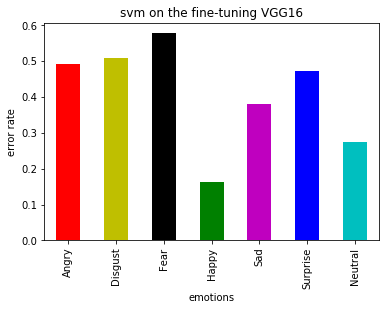

In [3]:
Utils.plt_emotions(err, 'svm on the top of cnn(from scratch hit61.63%)')